In [2]:
import torch
import matplotlib.pyplot as plt
from distmap import (
    l1_distance_transform,
    l1_signed_transform,
    euclidean_distance_transform,
    euclidean_signed_transform,
)

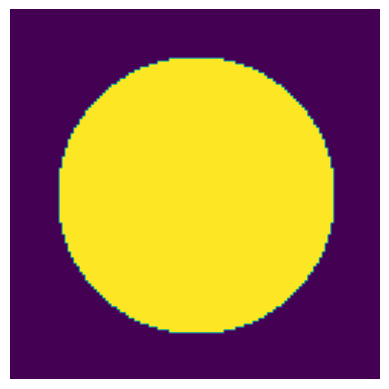

In [7]:
# Generate the maks of a circle

circle = torch.stack(torch.meshgrid(*[torch.arange(128, dtype=torch.float32)]*2, indexing='ij'), -1)
circle = circle.sub_(128/2).square().sum(-1).sqrt() < 48

plt.imshow(circle)
plt.axis('off')
plt.show()

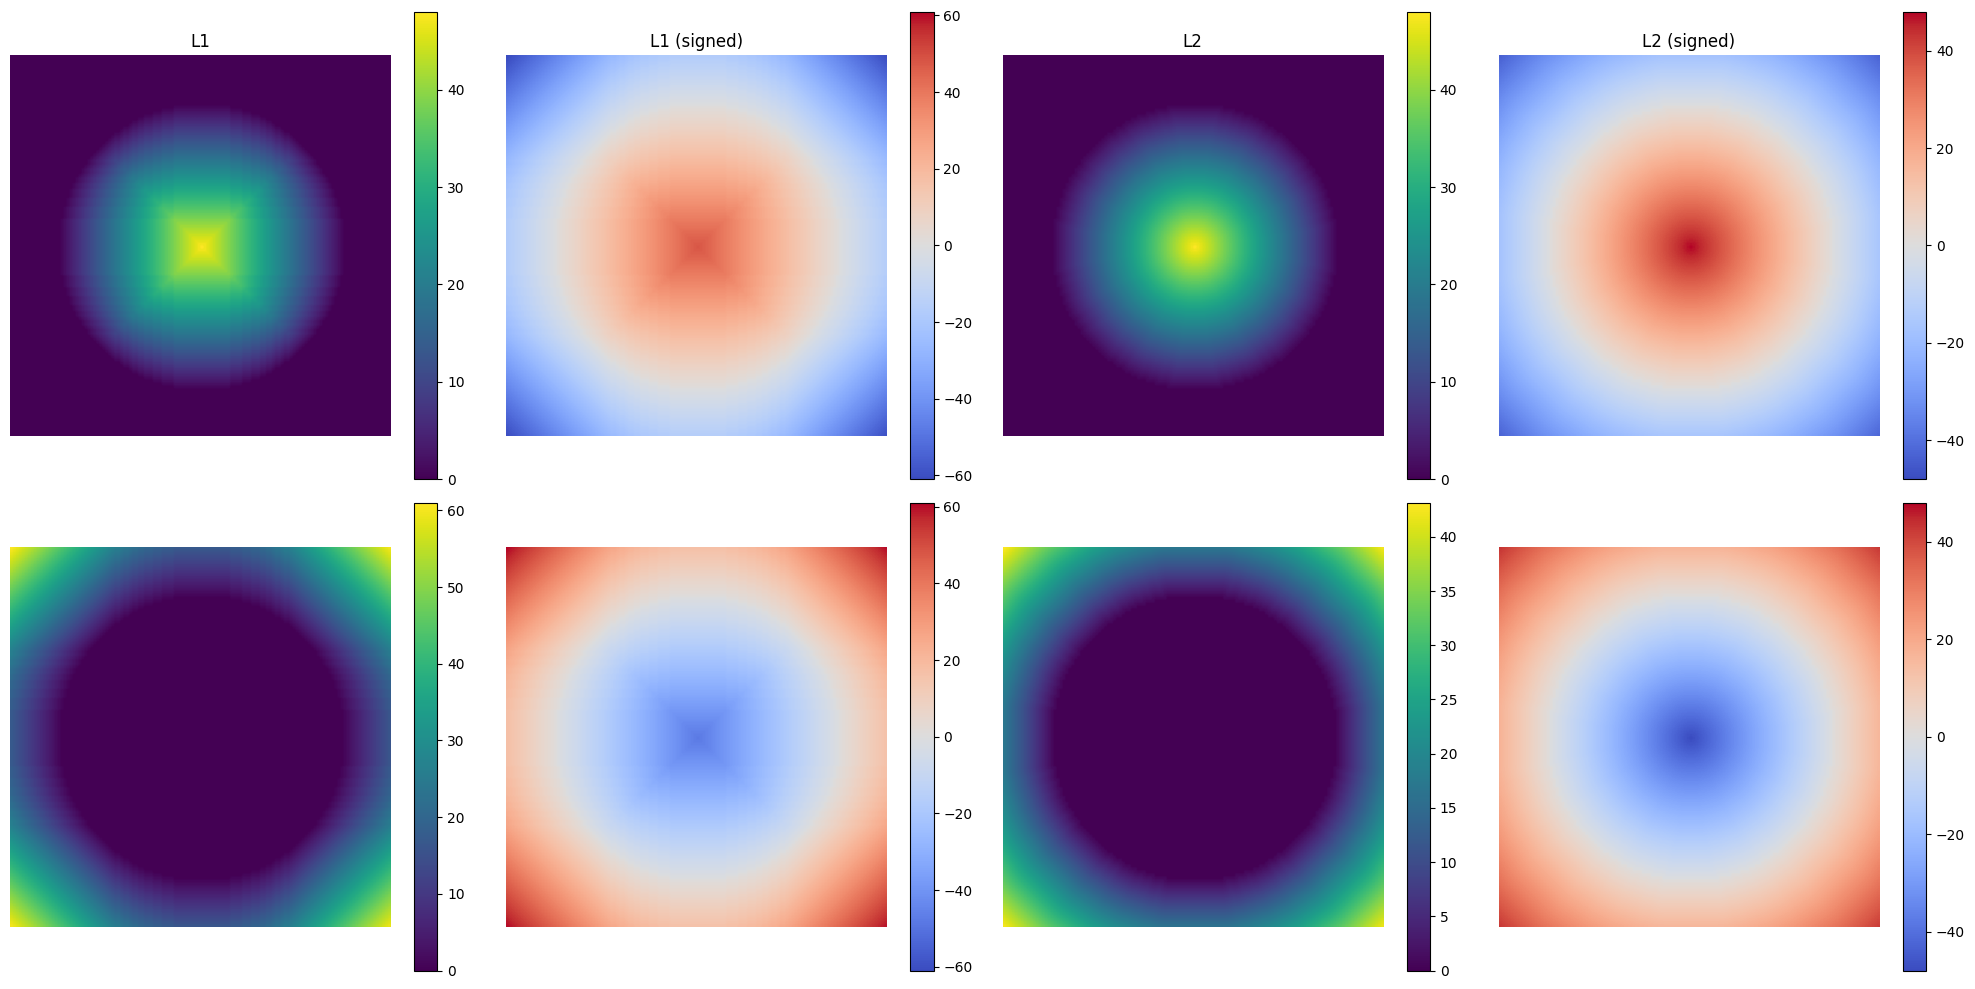

In [10]:
# Compute different distances

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
dt = l1_distance_transform(circle)
plt.imshow(dt)
plt.axis('off')
plt.colorbar()
plt.title('L1')

plt.subplot(2, 4, 2)
dt = l1_signed_transform(circle)
plt.imshow(dt, cmap='coolwarm', vmin=-dt.abs().max(), vmax=dt.abs().max())
plt.axis('off')
plt.colorbar()
plt.title('L1 (signed)')

plt.subplot(2, 4, 3)
dt = euclidean_distance_transform(circle)
plt.imshow(dt)
plt.axis('off')
plt.colorbar()
plt.title('L2')

plt.subplot(2, 4, 4)
dt = euclidean_signed_transform(circle)
plt.imshow(dt, cmap='coolwarm', vmin=-dt.abs().max(), vmax=dt.abs().max())
plt.axis('off')
plt.colorbar()
plt.title('L2 (signed)')

plt.subplot(2, 4, 5)
dt = l1_distance_transform(~circle)
plt.imshow(dt)
plt.axis('off')
plt.colorbar()

plt.subplot(2, 4, 6)
dt = l1_signed_transform(~circle)
plt.imshow(dt, cmap='coolwarm', vmin=-dt.abs().max(), vmax=dt.abs().max())
plt.axis('off')
plt.colorbar()

plt.subplot(2, 4, 7)
dt = euclidean_distance_transform(~circle)
plt.imshow(dt)
plt.axis('off')
plt.colorbar()

plt.subplot(2, 4, 8)
dt = euclidean_signed_transform(~circle)
plt.imshow(dt, cmap='coolwarm', vmin=-dt.abs().max(), vmax=dt.abs().max())
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()